In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import datetime as dt

In [135]:
Cust_Acq = pd.read_csv(r"E:\Python case study\Python Foundation Case Study 2 - Credit Card Case Study\Case Study 2 - Credit Card Case Study\Customer Acqusition.csv")
Cust_Acq

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...,...
95,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
96,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt
97,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary
98,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed


In [136]:
Repayment = pd.read_csv(r"E:\Python case study\Python Foundation Case Study 2 - Credit Card Case Study\Case Study 2 - Credit Card Case Study\Repayment.csv")
Repayment

,SL No:,Customer,Month,Amount
0,1,A1,12-Jan-04,495414.75
1,2,A1,03-Jan-04,245899.02
2,3,A1,15-Jan-04,259490.06
3,4,A1,25-Jan-04,437555.12
4,5,A1,17-Jan-05,165972.88
...,...,...,...,...
1495,1496,A67,09-May-05,55638.77
1496,1497,A68,10-May-06,319836.49
1497,1498,A69,11-Jul-06,247628.45
1498,1499,A70,12-Aug-05,454016.51


In [137]:
Spend = pd.read_csv(r"E:\Python case study\Python Foundation Case Study 2 - Credit Card Case Study\Case Study 2 - Credit Card Case Study\spend.csv")
Spend

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...
1495,1496,A67,4-Feb-06,BUS TICKET,356872.73
1496,1497,A68,25-Mar-06,BUS TICKET,204971.10
1497,1498,A69,31-Mar-06,BUS TICKET,50449.44
1498,1499,A70,23-Mar-06,BUS TICKET,80593.94


In [138]:
###  a. In case age is less than 18, replace it with mean of age values.
Mean_age = Cust_Acq.loc[Cust_Acq['Age']>= 18, 'Age'].mean()
Cust_Acq.loc[Cust_Acq['Age'] < 18 ,'Age'] = Mean_age
Mean_age

C:\Users\ksriv\AppData\Local\Temp\ipykernel_7700\2448252475.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '48.52127659574468' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  Cust_Acq.loc[Cust_Acq['Age'] < 18 ,'Age'] = Mean_age


48.52127659574468

In [139]:
#### b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit. 
 #       (customer’s limit provided in acquisition table is the per transaction limit on his card)
Merged_Spend = pd.merge(left = Cust_Acq , right = Spend , how = 'left' )
Merged_Spend['Amount'] = np.where(Merged_Spend['Amount'] > Merged_Spend['Limit'], 0.5* Merged_Spend['Limit'],Merged_Spend['Amount'])
Merged_Spend['Amount']


0       485470.80
1       410556.13
2        23740.46
3       484342.47
4       369694.07
          ...    
1495     54729.66
1496      5000.00
1497      5000.50
1498      5001.00
1499     50000.00
Name: Amount, Length: 1500, dtype: float64

In [140]:
#### c. Incase the repayment amount is more than the limit, replace the repayment with the limit.
Merged_Repayment = pd.merge(left = Cust_Acq , right = Repayment , how = 'left')
Merged_Repayment['Amount'] = np.where(Merged_Repayment['Amount'] > Merged_Repayment['Limit'] , Merged_Repayment['Limit'] ,
                                       Merged_Repayment['Amount'])
Merged_Repayment['Amount']


0       495414.75
1       245899.02
2       259490.06
3       437555.12
4       165972.88
          ...    
1495    100000.00
1496     10000.00
1497     10001.00
1498     10002.00
1499     69551.19
Name: Amount, Length: 1500, dtype: float64

### 2. From the above dataset create the following summaries:

In [141]:
###  a. How many distinct customers exist?
Customers = Cust_Acq.Customer.nunique()
print("No of disctinct customers:",Customers)

No of disctinct customers: 100


In [142]:
####  b. How many distinct categories exist?
Categories = Spend.Type.nunique()
print("No of distinct categories:",Categories)

No of distinct categories: 15


In [143]:
####  c. What is the average monthly spend by customers?
Merged_Spend['Month'] = pd.to_datetime(Merged_Spend['Month'] , format = '%d-%b-%y')
Monthly_spend = Merged_Spend.groupby([Merged_Spend['Month'].dt.year , Merged_Spend['Month'].dt.month])['Amount'].mean().mean()
print("Average monthly spend by customers:",Monthly_spend)

Average monthly spend by customers: 145656.1578199565


In [144]:
####  d. What is the average monthly repayment by customers?
Merged_Repayment['Month'] = pd.to_datetime(Merged_Repayment['Month'] , format = '%d-%b-%y')
Monthly_Spend = Merged_Repayment.groupby([Merged_Repayment['Month'].dt.year , Merged_Repayment['Month'].dt.month])['Amount'].mean().mean()
print("Average monthly spend by customers:",Monthly_Spend)

Average monthly spend by customers: 159654.68126635955


In [145]:
#### e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? 
        ##(Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment 
        ##– Monthly spend. Interest is earned only on positive profits and not on negative amounts"""
Monthly_profit = Merged_Repayment.groupby([Merged_Repayment['Month'].dt.year , Merged_Repayment['Month'].dt.month])['Amount'].sum() - \
                Merged_Spend.groupby([Merged_Spend['Month'].dt.year , Merged_Spend['Month'].dt.month])['Amount'].sum()
Monthly_profit = Monthly_profit[Monthly_profit > 0]
Interest_rate = 0.029
Monthly_profit = Monthly_profit * Interest_rate
print("Profit for the bank for each month:\n",Monthly_profit)

Profit for the bank for each month:
 Month  Month
2004   1         14854.05404
       3         23043.57255
       4         51607.36760
       5         47449.29395
       11        19528.87637
2005   5        265963.41583
       7          3134.77994
       8         45866.50701
       10        10930.31228
       12        28060.53369
2006   1         15795.98796
       2         32004.72132
       3         87247.51848
       4        103870.19639
       5        198756.47002
       7         29033.92478
       9         11449.36704
       10         1085.96445
       12         9050.79038
Name: Amount, dtype: float64


In [146]:
####  f. What are the top 5 product types?
Top_5 = Merged_Spend.groupby('Type')['Amount'].sum().nlargest(5)
Top_5

Type
PETRO           28597384.98
CAMERA          27690738.44
FOOD            20519243.60
AIR TICKET      20155847.12
TRAIN TICKET    19995825.72
Name: Amount, dtype: float64

In [147]:
####  g. Which city is having maximum spend?
City_spend = Merged_Spend.groupby('City')['Amount'].sum().idxmax()
print("City has maximum spend:",City_spend)

City has maximum spend: COCHIN


In [177]:
####  h. Which age group is spending more money?
Merged_Spend['Age Group'] = pd.cut(Merged_Spend['Age'] , [0 ,18 ,25, 35 , 45, 55, 65, 100] ,
                                   labels = ['0-18','19-25','26-35','36-45','46-55','56-65','66-100'])
Age_spend = Merged_Spend.groupby('Age Group')['Amount'].sum().idxmax()
print("Age group that spending more money:",Age_spend)

Age group that spending more money: 46-55


C:\Users\ksriv\AppData\Local\Temp\ipykernel_7700\3881915559.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Age_spend = Merged_Spend.groupby('Age Group')['Amount'].sum().idxmax()


In [149]:
#### i. Who are the top 10 customers in terms of repayment?
Top_10_customers = Merged_Repayment.groupby('Customer')['Amount'].sum().nlargest(10)
print("Top 10 Customers in terms of repayment:\n",Top_10_customers)

Top 10 Customers in terms of repayment:
 Customer
A61    10539142.91
A60     9876290.74
A13     9572000.66
A43     8489871.46
A45     8448334.87
A12     8334760.16
A14     7943268.63
A44     7744730.12
A39     7622483.30
A42     7615460.86
Name: Amount, dtype: float64


#### 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [150]:
Merged_Spend['Year'] = Merged_Spend['Month'].dt.year
City_product_yearly_spend = Merged_Spend.groupby(['City','Type','Year'])['Amount'].sum()
print("City wise spend on each product on yearly basis:\n",City_product_yearly_spend)

City wise spend on each product on yearly basis:
 City        Type          Year
BANGALORE   AIR TICKET    2004     749981.04
                          2005    1972296.92
                          2006    1311522.46
            AUTO          2005     141539.79
                          2006     822785.32
                                     ...    
TRIVANDRUM  SHOPPING      2005     428833.42
                          2006     100001.00
            TRAIN TICKET  2004     177612.22
                          2005     276962.03
                          2006     262422.86
Name: Amount, Length: 321, dtype: float64


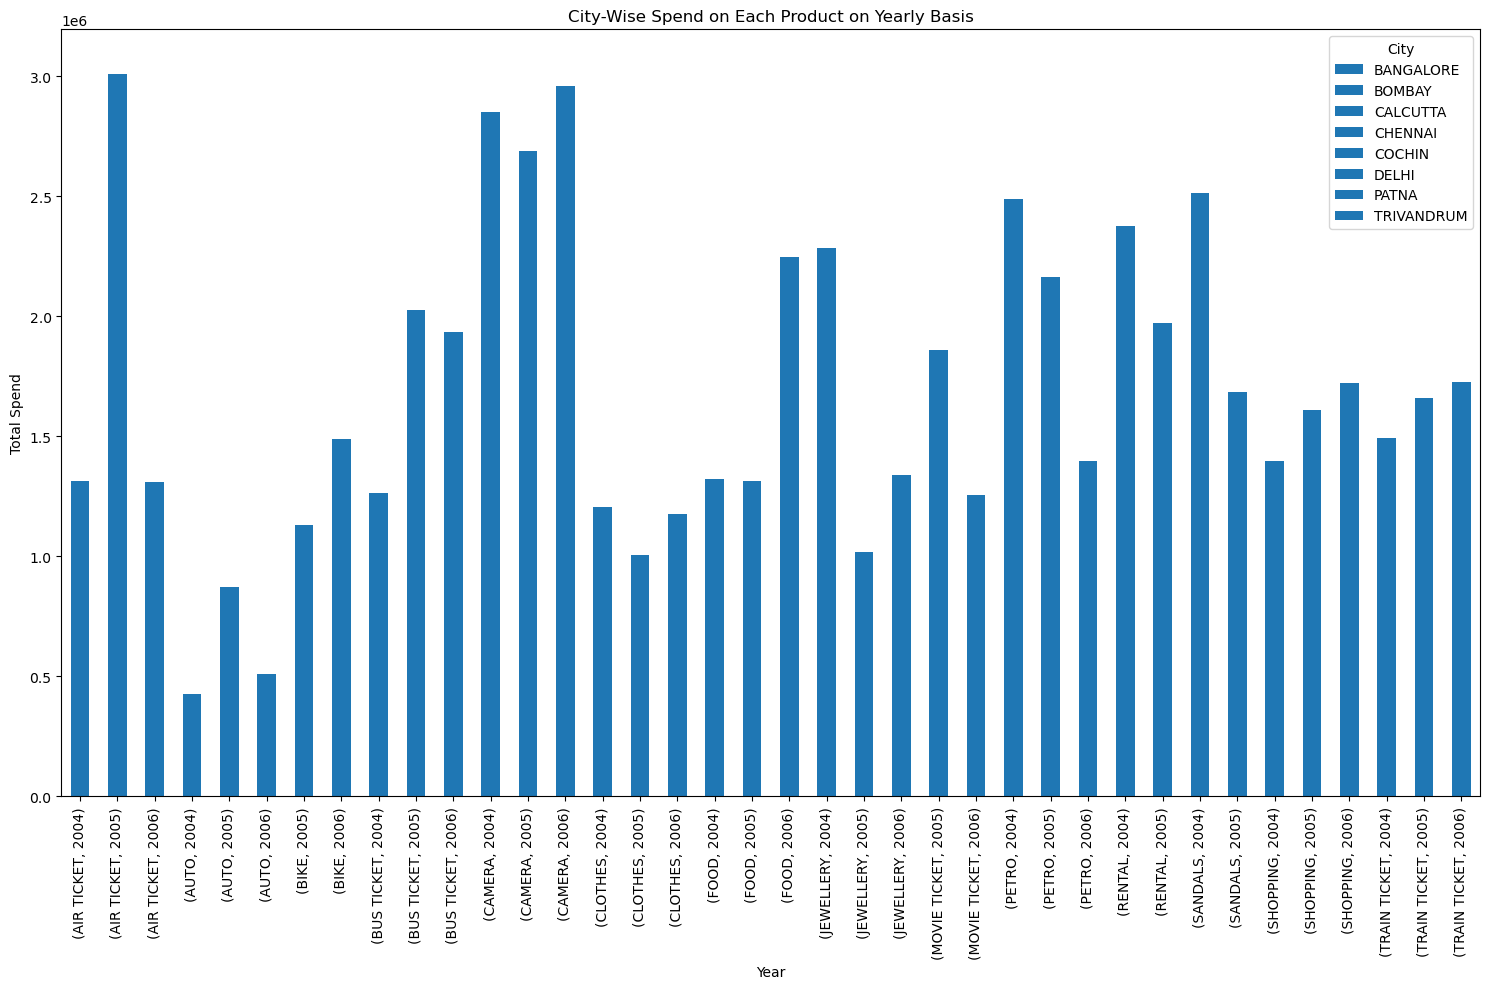

In [151]:
fig, ax = plt.subplots(figsize=(15, 10))

# Iterate through each city to create a plot
for City in City_product_yearly_spend.index.get_level_values(0).unique():
    # Get the data for the city
    city_data = City_product_yearly_spend.loc[City]
    
    # Plot the data
    city_data.plot(kind='bar', stacked=True, ax=ax, label=City)


plt.title('City-Wise Spend on Each Product on Yearly Basis')
plt.xlabel('Year')
plt.ylabel('Total Spend')
plt.legend(title='City')
plt.tight_layout()

plt.show()

#### 4. Create graphs for

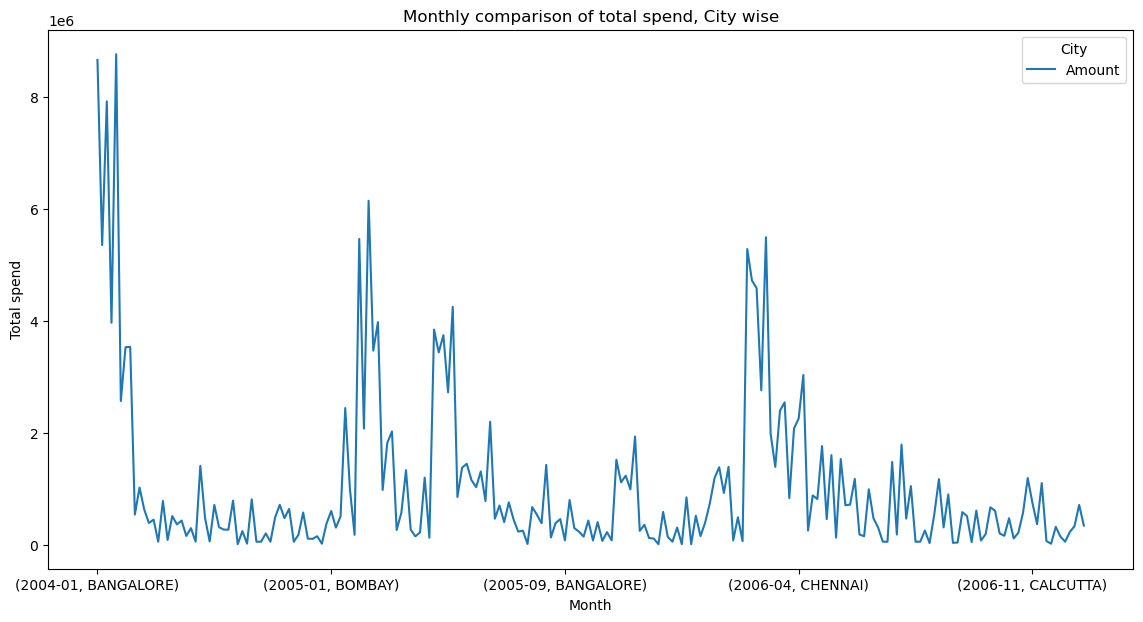

In [152]:
#### a. Monthly comparison of total spends, city wise
Monthly_city_spend = Merged_Spend.groupby([Merged_Spend['Month'].dt.to_period('M'),'City'])['Amount'].sum()
Monthly_city_spend.plot(kind = 'line' , figsize = (14,7))
plt.title("Monthly comparison of total spend, City wise")
plt.xlabel('Month')
plt.ylabel('Total spend')
plt.legend(title = 'City')
plt.show()

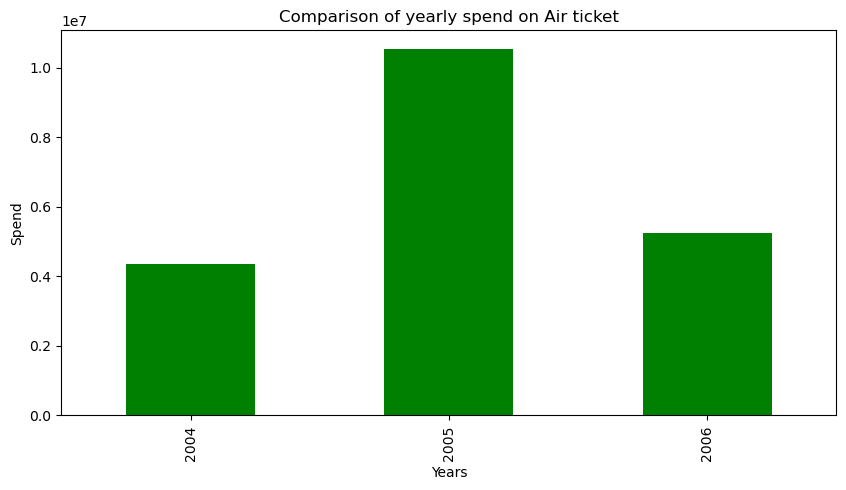

In [153]:
#### b. Comparison of yearly spend on air tickets
Air_ticket = Merged_Spend[Merged_Spend['Type'] == 'AIR TICKET']
Yearly_Spend = Air_ticket.groupby(Merged_Spend['Month'].dt.year)['Amount'].sum()
Yearly_Spend.plot(kind = 'bar' , figsize = (10,5), color = 'g')
plt.title("Comparison of yearly spend on Air ticket")
plt.xlabel('Years')
plt.ylabel('Spend')
plt.show()

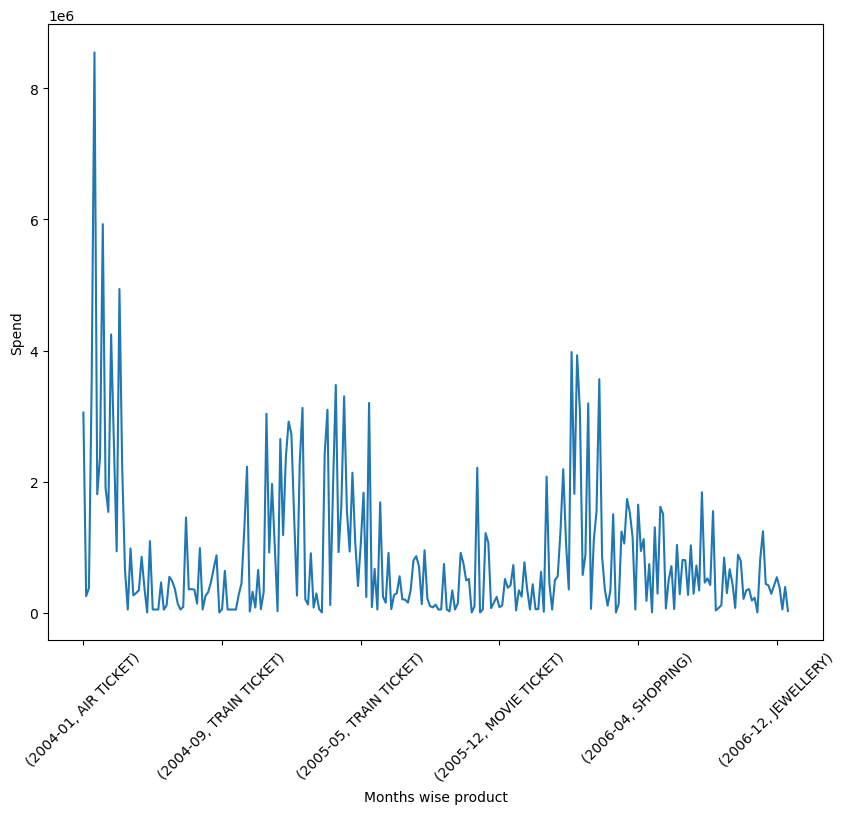

In [154]:
####  c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)
Monthly_product_spend = Merged_Spend.groupby([Merged_Spend['Month'].dt.to_period('M'),'Type'])['Amount'].sum()
Monthly_product_spend.plot(kind = 'line' , figsize = (10,8))
plt.xlabel('Months wise product')
plt.ylabel('Spend')
plt.xticks(rotation = 45)
plt.show()


#### 5. Write user defined PYTHON function to perform the following analysis:

* You need to find top 10 customers for each city in terms of their repayment amount by 
different products and by different time periods i.e. year or month. The user should be able 
to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the 
function should automatically take these inputs while identifying the top 10 customers

In [155]:
def top_customers_by_repayment(product, time_period):
    filtered_repayment = Merged_Repayment[Merged_Repayment['Product'] == Product]

    if time_period == 'yearly':
        filtered_repayment['Period'] = filtered_repayment['Month'].dt.year
    elif time_period == 'monthly':
        filtered_repayment['Period'] = filtered_repayment['Month'].dt.to_period('M')
    else:
        raise ValueError("Invalid time period. Choose 'yearly' or 'monthly'.")

    aggregated_repayment = filtered_repayment.groupby(['City', 'Customer', 'Period'])['Amount'].sum().reset_index()

    top_customers = aggregated_repayment.groupby(['City', 'Period']).apply(lambda x: x.nlargest(10, 'Amount')).reset_index(drop=True)

    return top_customers
Product = 'Gold'
time_period = 'yearly'
top_customers = top_customers_by_repayment(product , time_period)
print(top_customers)


          City Customer  Period      Amount
0    BANGALORE      A14    2004  2770261.30
1    BANGALORE       A1    2004  2359797.84
2    BANGALORE      A13    2004  2337012.77
3    BANGALORE      A43    2004  1906497.47
4    BANGALORE      A30    2004   978777.17
..         ...      ...     ...         ...
83       PATNA      A26    2006  3330421.30
84       PATNA      A66    2006   113094.58
85  TRIVANDRUM      A28    2004   965108.49
86  TRIVANDRUM      A28    2005  2827009.82
87  TRIVANDRUM      A28    2006  3376614.65

[88 rows x 4 columns]


C:\Users\ksriv\AppData\Local\Temp\ipykernel_7700\2979928564.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_repayment['Period'] = filtered_repayment['Month'].dt.year
